In [24]:
def get_weight(edge):
    """

    :param edge: graph edge represented as a triple (vertex, vertex, weight)
    :return: the weight of the edge (assumed to be at index 2)
    """

    return edge[2]


def is_disjoint(edge_list, new_edge):
    """

    :param edge_list: list of graph edges represented as a triple (vertex, vertex, weight)
    :param edge: graph edge represented as a triple (vertex, vertex, weight)
    :return: True if new_edge is vertex-disjoint from all edges in edge_list. False, otherwise.
    """

    for edge in edge_list:
        if edge[0] == new_edge[0] or edge[0] == new_edge[1] or edge[1] == new_edge[1] or edge[1] == new_edge[1]:
            return False

    # Since no edge in edge_list has a common vertex with new_edge,
    # new_edge is disjoint from all edges in edge_list
    return True


def max_matching_greedy(graph):
    """

    Finds a matching of maximum weight generated according to greedy selection.

    :param graph: list of graph edges represented as a triple (vertex, vertex, weight)
    :return: list of graph edges comprising the maximum weight matching generated according to
                greedy selection of edges.
    """

    greedy_matching = list()

    # Create a new copy of the input graph sorted in descending order of weight
    # The custom function get_weight is used as the sorting function.
    graph_copy = sorted(graph, key = get_weight, reverse = True)

    # Loop over sorted list and add an edge if it is vertex-disjoint from all
    # previously added edges
    for candidate_edge in graph_copy:
        if is_disjoint(greedy_matching, candidate_edge):
            greedy_matching.append(candidate_edge)

    return greedy_matching

In [8]:
ex_graph = [
    ('a', 'x', 5),
    ('a', 'y', 4),
    ('a', 'z', 6),
    ('b', 'x', 8),
    ('b', 'y', 4),
    ('b', 'z', 9),
    ('c', 'x', 2),
    ('c', 'y', 5),
    ('c', 'd', 4)
]

# Greedy algorithms are not always optimal.
ex_graph2 = [
    ('a', 'y', 100),
    ('a', 'z', 99),
    ('b', 'y', 99),
    ('b', 'z', 1)

]

In [26]:
ex_graph.sort(key = get_weight, reverse = True)
print(ex_graph)

print(max_matching_greedy(ex_graph))

[('b', 'z', 9), ('b', 'x', 8), ('a', 'z', 6), ('a', 'x', 5), ('c', 'y', 5), ('a', 'y', 4), ('b', 'y', 4), ('c', 'd', 4), ('c', 'x', 2)]
[('b', 'z', 9), ('a', 'x', 5), ('c', 'y', 5)]


In [27]:
ex_graph2.sort(key = get_weight, reverse = True)
print(ex_graph2)

print(max_matching_greedy(ex_graph2))

[('a', 'y', 100), ('a', 'z', 99), ('b', 'y', 99), ('b', 'z', 1)]
[('a', 'y', 100), ('b', 'z', 1)]


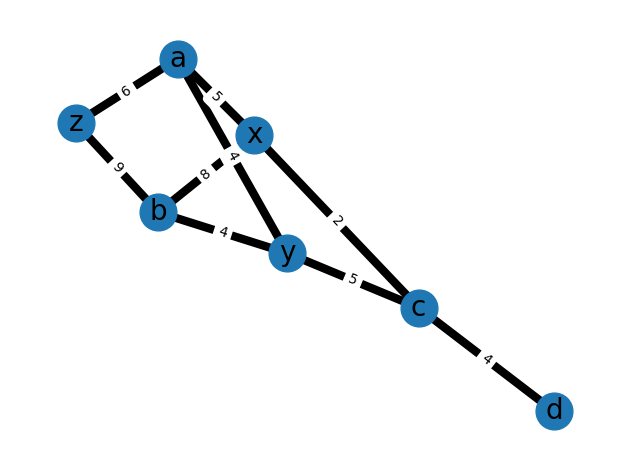

In [17]:
# Some code I stole for visualization
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "x", weight=5)
G.add_edge("a", "y", weight=4)
G.add_edge("a", "z", weight=6)
G.add_edge("b", "x", weight=8)
G.add_edge("b", "y", weight=4)
G.add_edge("b", "z", weight=9)
G.add_edge("c", "x", weight=2)
G.add_edge("c", "y", weight=5)
G.add_edge("c", "d", weight=4)


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

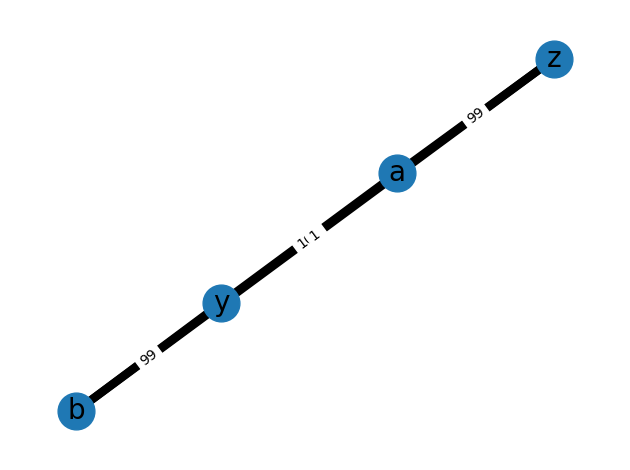

In [28]:
# Some code I stole for visualization
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "y", weight=100)
G.add_edge("a", "z", weight=99)
G.add_edge("b", "y", weight=99)
G.add_edge("b", "z", weight=1)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()